In [61]:
import os
import yaml
from glob import glob
from tqdm import tqdm

import matplotlib.pyplot as plt
import numpy as np
from astropy.visualization import make_lupton_rgb

from mejiro.utils import util

# read configuration file
with open('/grad/bwedig/mejiro/mejiro/data/mejiro_config/hwo.yaml', 'r') as f:
    config = yaml.load(f, Loader=yaml.SafeLoader)

In [62]:
data_dir = os.path.join(config['data_dir'], config['pipeline_label'], '04')

j_pickles = sorted(glob(os.path.join(data_dir, 'SyntheticImage_*_J.pkl')))  # 'sca*', 
h_pickles = sorted(glob(os.path.join(data_dir, 'SyntheticImage_*_H.pkl')))  # 'sca*', 
k_pickles = sorted(glob(os.path.join(data_dir, 'SyntheticImage_*_K.pkl')))  # 'sca*', 
print(f'Found {len(j_pickles)} pickle(s) in {data_dir}')

Found 1000 pickle(s) in /data/bwedig/mejiro/hwo/04


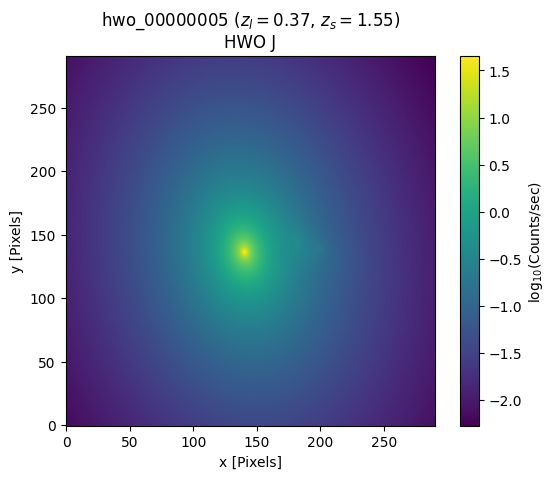

In [63]:
sample = util.unpickle(j_pickles[0])
sample.plot()

In [64]:
# limit to first 100
j_pickles = j_pickles[:100]
h_pickles = h_pickles[:100]
k_pickles = k_pickles [:100]

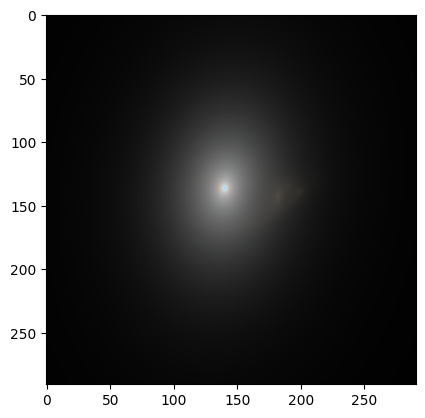

In [65]:
j_sample = util.unpickle(j_pickles[0])
h_sample = util.unpickle(h_pickles[0])
k_sample = util.unpickle(k_pickles[0])

# Normalize each channel by its 99th percentile to balance colors
j_sample.image = j_sample.image / np.percentile(j_sample.image, 99)
h_sample.image = h_sample.image / np.percentile(h_sample.image, 99)
k_sample.image = k_sample.image / np.percentile(k_sample.image, 99)

rgb_image = make_lupton_rgb(
    k_sample.image, h_sample.image, j_sample.image,
    stretch=.5, Q=8
)

plt.imshow(rgb_image)
plt.show()

In [69]:
rgb_images = []
for j_pickle, h_pickle, k_pickle in tqdm(zip(j_pickles, h_pickles, k_pickles), total=len(j_pickles)):
    j_sample = util.unpickle(j_pickle)
    h_sample = util.unpickle(h_pickle)
    k_sample = util.unpickle(k_pickle)

    # Normalize each channel by its 99th percentile to balance colors
    # j_sample.image = j_sample.image / np.percentile(j_sample.image, 99)
    # h_sample.image = h_sample.image / np.percentile(h_sample.image, 99)
    # k_sample.image = k_sample.image / np.percentile(k_sample.image, 99)

    rgb_image = make_lupton_rgb(
        k_sample.image, h_sample.image, j_sample.image,
        stretch=.5, Q=8
    )

    rgb_images.append(rgb_image)

100%|██████████| 100/100 [00:43<00:00,  2.31it/s]


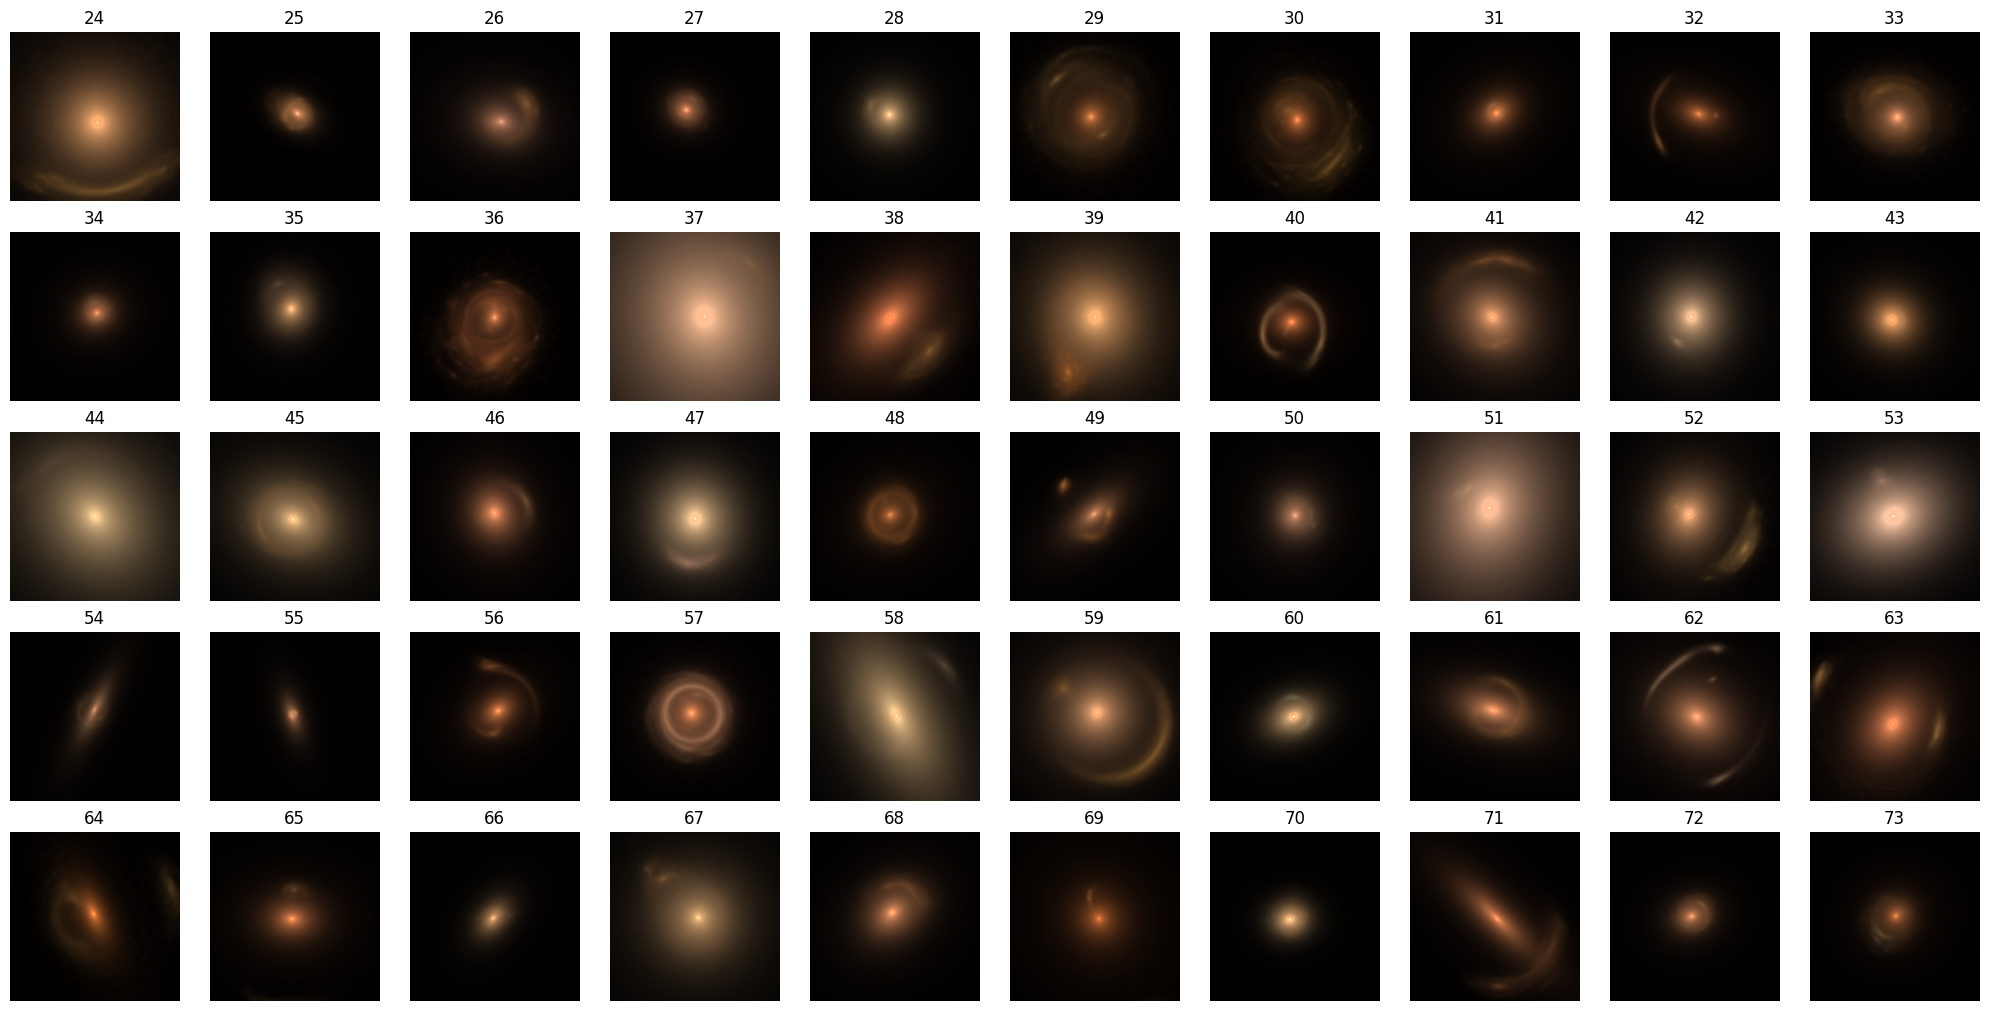

In [70]:
fig, axes = plt.subplots(5, 10, figsize=(20, 10), constrained_layout=True)
for idx, ax in enumerate(axes.flat):
    if idx < len(rgb_images):
        ax.imshow(rgb_images[idx + 24])
        ax.set_title(idx + 24)
        ax.axis('off')
    else:
        ax.axis('off')
# plt.tight_layout()
plt.savefig('/grad/bwedig/mejiro/projects/hwo/figures/rgb_sample.png', dpi=600)
plt.show()

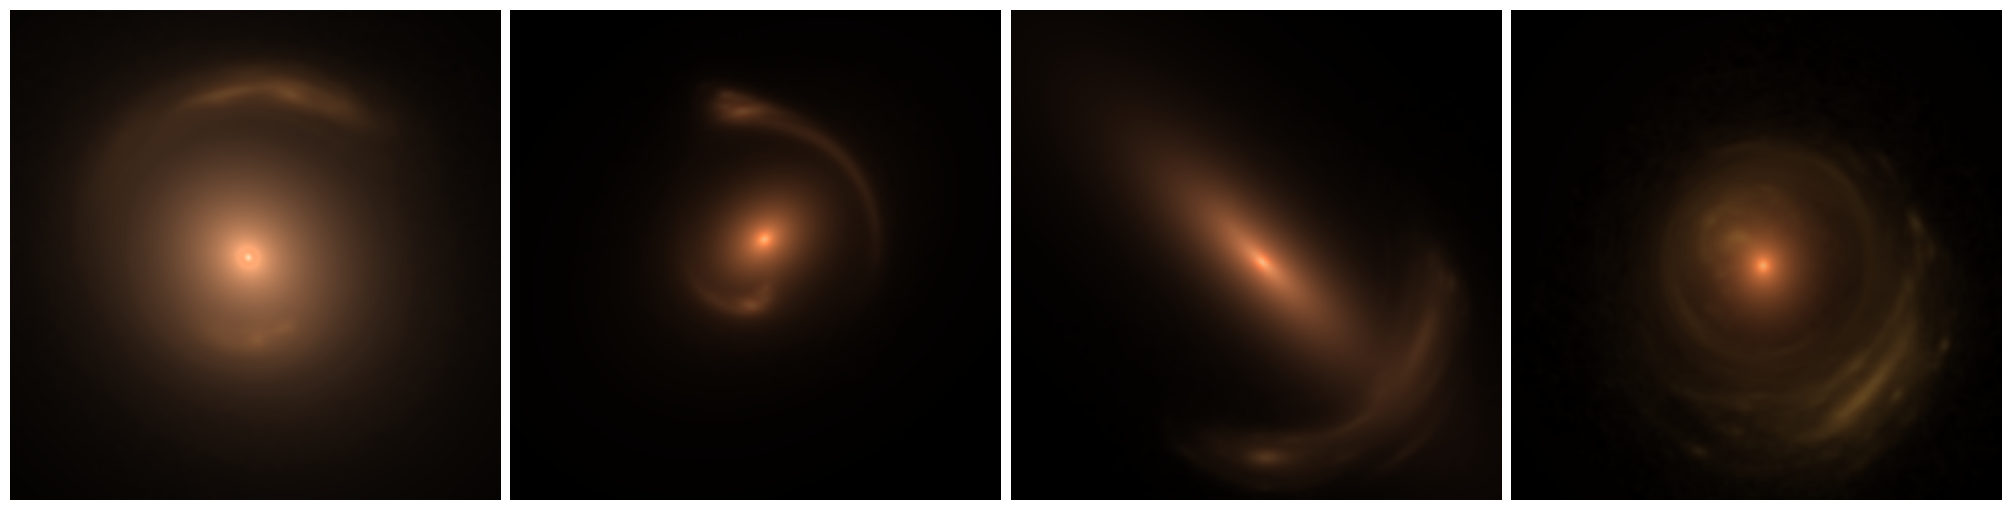

In [71]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5), constrained_layout=True)

axes.flatten()[0].imshow(rgb_images[41])
axes.flatten()[1].imshow(rgb_images[56])
axes.flatten()[2].imshow(rgb_images[71])
axes.flatten()[3].imshow(rgb_images[30])

for a in axes:
    a.axis('off')

plt.savefig('/grad/bwedig/mejiro/projects/hwo/figures/rgb_sample.png', dpi=600, bbox_inches='tight', pad_inches=0)
plt.show()